### Soccermatics
#### Assignment 1
##### Instructions
1. Think of a player who you enjoyed watching at the recent Men's Euros 2020 or Women's Euros 2022.
2. What actions did they perform that were important and why?
3. Plot the actions and describe how the data supports or contradicts your own analysis.
4. Collect some statistics on that player for the tournament and put them in context.
5. Write a short text using at most two figures that illustrate your point.

In [132]:
import pandas as pd
import numpy as np

import inflect

import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer import Sbopen, Pitch

In [133]:
mpl.rcParams['figure.dpi']= 300
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [136]:
COLOUR_BACKGROUND = '#f7f3ed'
COLOUR_ALMOST_BLACK = '#323232'
COLOUR_BLUE = '#1c7ed6'

In [13]:
euro_2022_competition_id = 53
euro_2022_season_id = 106

wwc_competition_id = 72
wwc_season_id = 30

In [4]:
parser = Sbopen()

In [18]:
df_matches = parser.match(competition_id=wwc_competition_id, season_id=wwc_season_id)

In [26]:
df_matches_australia = df_matches[(df_matches['home_team_country_name']=='Australia') | (df_matches['away_team_country_name']=='Australia')]

In [29]:
df_matches_australia['match_id']

1     68311
2     68357
3     22933
38    22955
Name: match_id, dtype: int64

In [78]:
events = {}
related_events = {}
freezes = {}
tactics = {}

for match_id in df_matches_australia['match_id']:
    events[match_id], related_events[match_id], freezes[match_id], tactics[match_id] = parser.event(match_id)


In [87]:
df_events = pd.concat(list(events.values()))

In [105]:
def filter_for_player_and_event(df, player_name, event_type_name):
    df_filtered = df[(df['player_name']==player_name) & (df['type_name']==event_type_name)]
    return df_filtered

In [174]:
def plot_lines(df, ax, colour, min_dx=0):
    for i, event in df.iterrows():
        dx = event['end_x']-event['x']
        dy = event['end_y']-event['y']
        
        if dx >= min_dx:
            pass_circle = plt.Circle((event['x'], event['y']), 1.5, color=colour)
            pass_circle.set_alpha(.2)
            ax.add_patch(pass_circle)
            pass_arrow = mpl.patches.FancyArrowPatch((event['x'], event['y']),
                                (event['end_x'], event['end_y']), arrowstyle='-|>', shrinkA=0, shrinkB=0, color=colour, alpha=0.7, mutation_scale=15)
            ax.add_patch(pass_arrow)


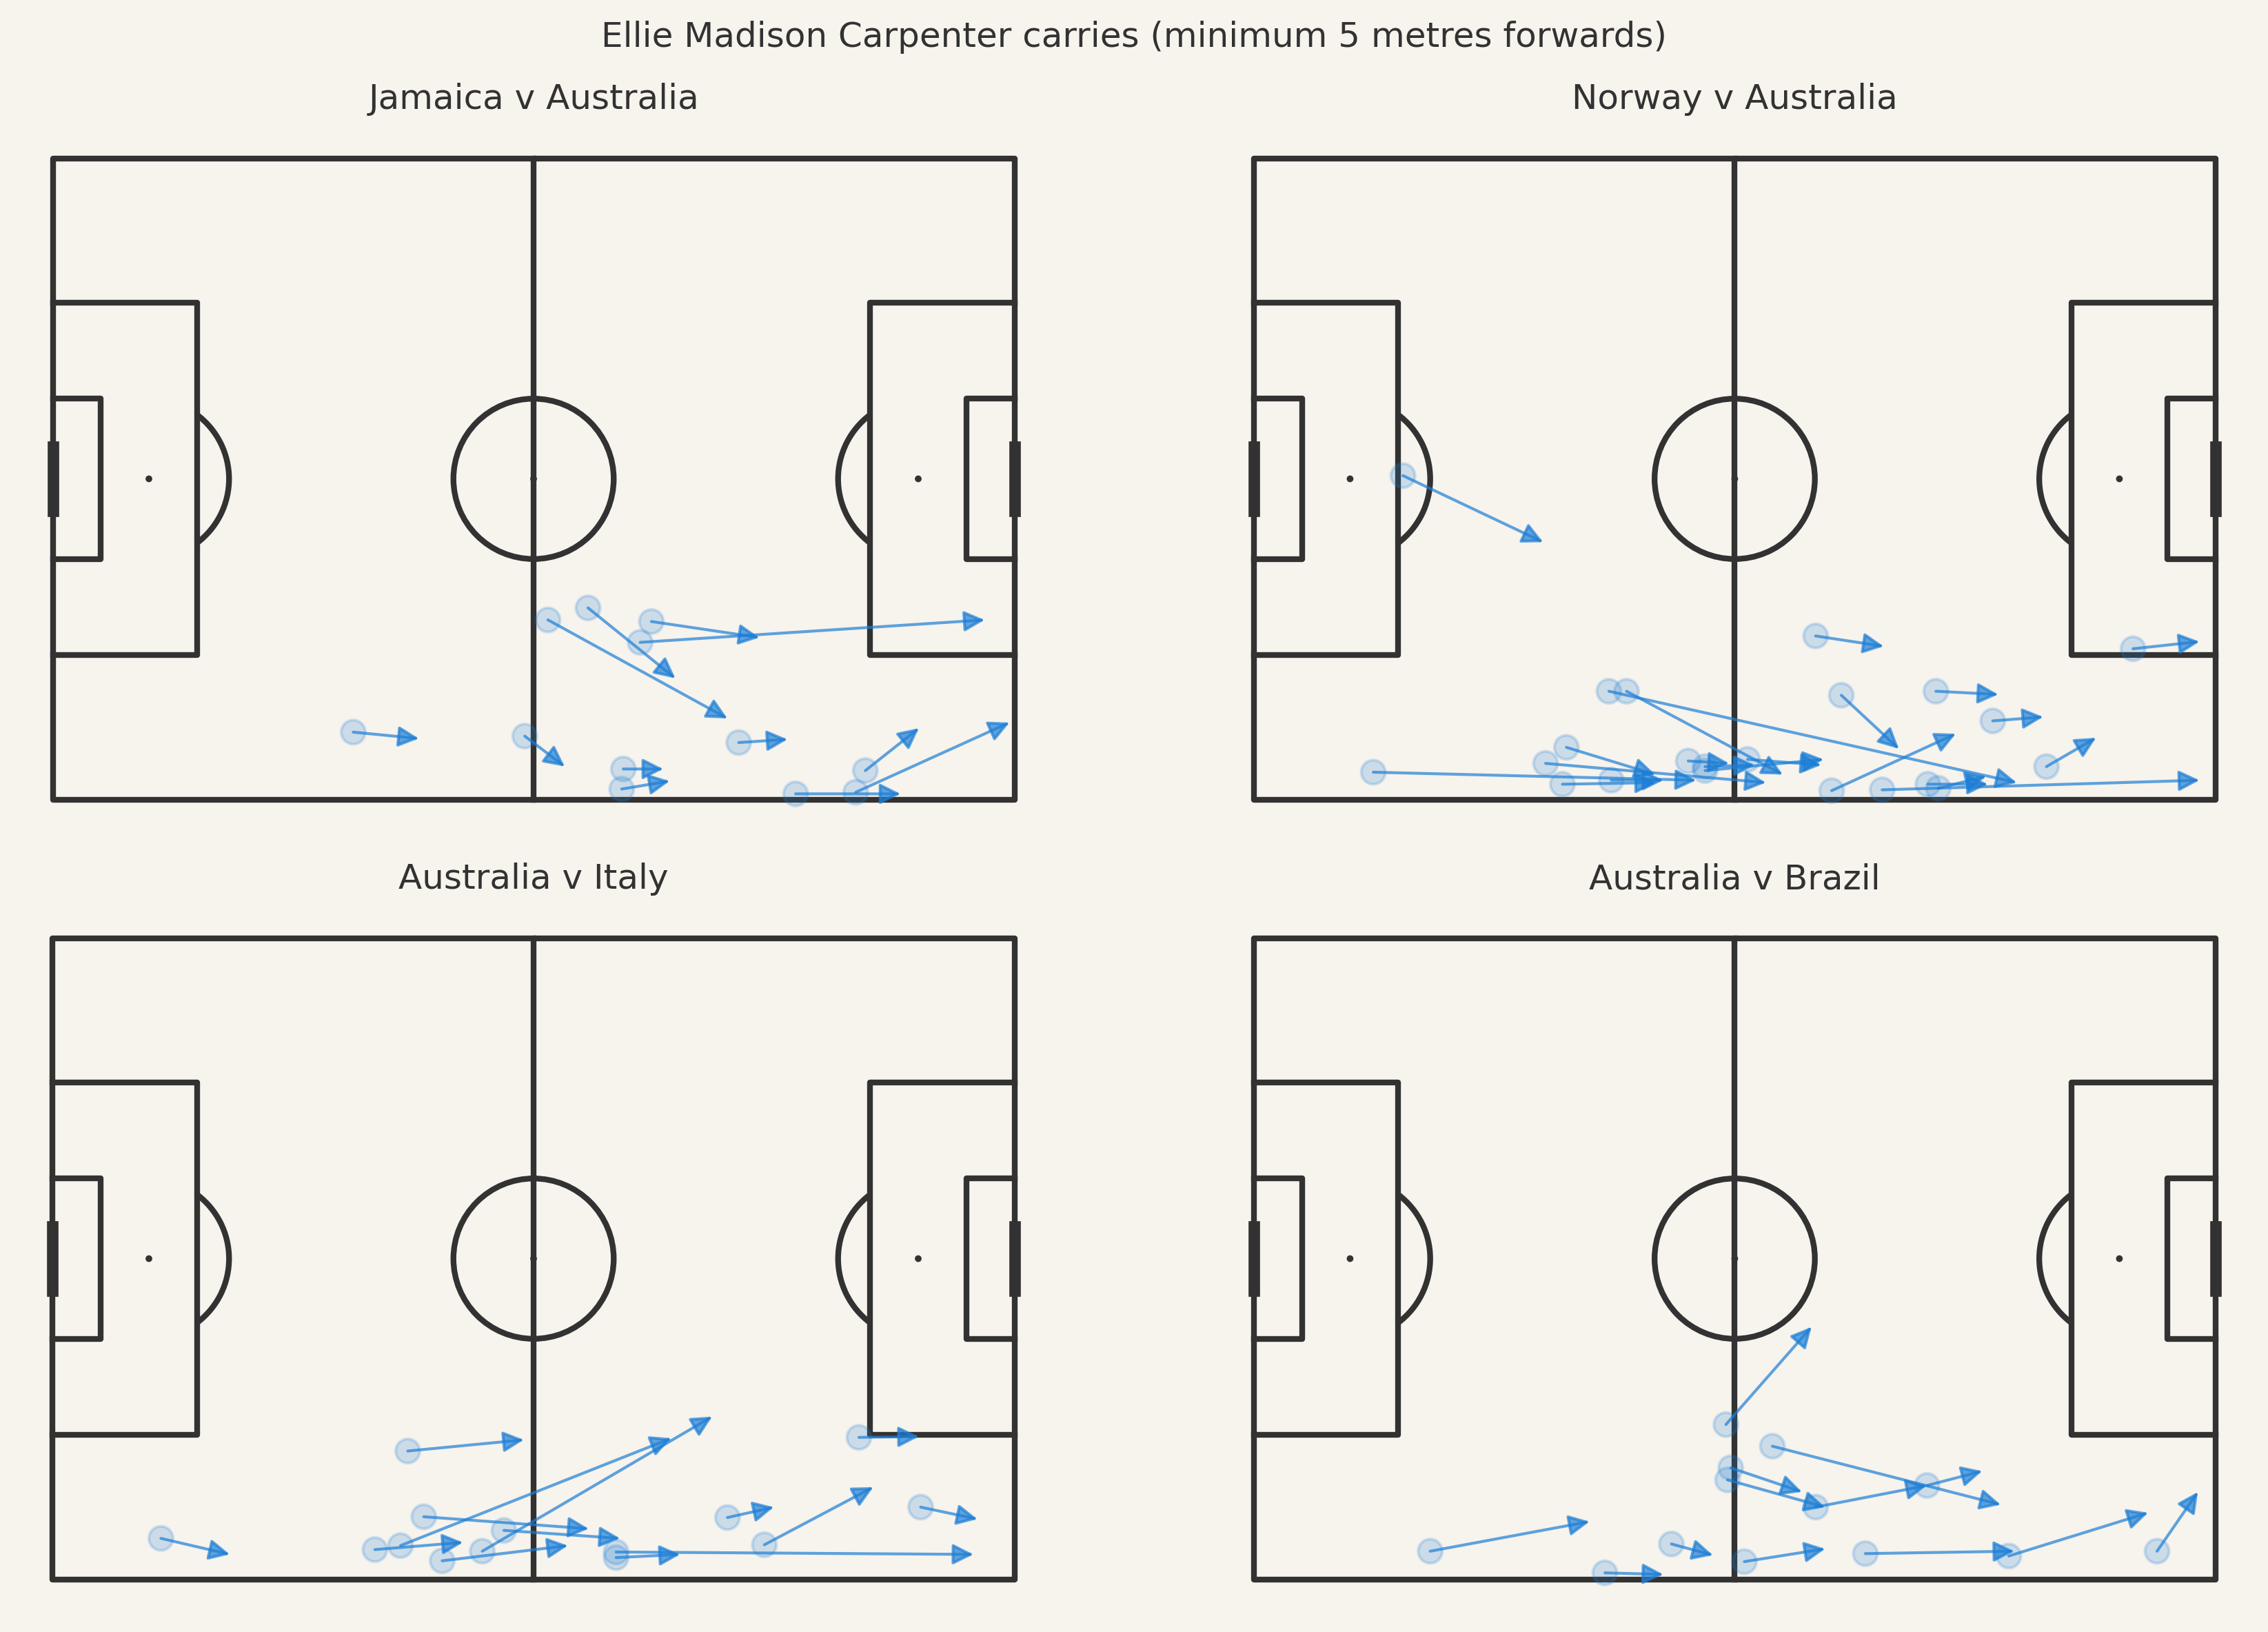

In [175]:
player_name = 'Ellie Madison Carpenter'
event_type_name = 'Carry'
min_dx = 5

pitch = Pitch(pitch_color=COLOUR_BACKGROUND, line_color=COLOUR_ALMOST_BLACK,
              stripe_color='#c2d59d', stripe=False)

fig, ax = pitch.draw(nrows=2, ncols=2, figsize=(12,8))

fig.patch.set_facecolor(COLOUR_BACKGROUND)

for i, match_id in enumerate(events.keys()):
    df_temp = events[match_id]
    home_team_country = df_matches[df_matches['match_id']==match_id]['home_team_country_name'].iloc[0]
    away_team_country = df_matches[df_matches['match_id']==match_id]['away_team_country_name'].iloc[0]
    match_name = home_team_country + ' v ' + away_team_country
    df_player_events = filter_for_player_and_event(df_temp, player_name, event_type_name)
    plot_lines(df_player_events, ax=ax.flatten()[i], colour=COLOUR_BLUE, min_dx=min_dx)
    ax.flatten()[i].set_title(match_name, color=COLOUR_ALMOST_BLACK)

if min_dx:
    title_additional = ' (minimum ' + str(min_dx) + ' metres forwards)'

p = inflect.engine()

fig.suptitle(player_name + ' ' + p.plural(event_type_name.lower()) + title_additional, color=COLOUR_ALMOST_BLACK);
